# Graph Examples

In [ ]:
library(astsa)

names(econ5)
head(econ5)
dim(econ5)

In [ ]:
plot(econ5)

In [ ]:
plot(econ5$gnp, econ5$consum, main="gnp and consumption", xlab = "GNP" ,ylab = " consumption", col = "blue")
abline(lm(consum ~ gnp, data = econ5), col = "red")

In [ ]:
library(ggplot2)

qplot(diamonds$carat, diamonds$price)
# qplot(carat, price, data = diamonds)

In [ ]:
qplot(carat, price, data = diamonds, geom="point", color = clarity)

# ggplot(data=diamonds, aes(x=carat, y=price, color=clarity)) + geom_point() + geom_smooth()

In [ ]:
qplot(carat, price, data = diamonds, geom=c("point", "smooth"), method=lm)

In [ ]:
qplot(carat, price, data = diamonds, color= clarity, geom=c("point", "smooth"), method=lm)

In [ ]:
qplot(carat,data = diamonds, geom="histogram")

In [ ]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_smooth()

In [ ]:
library(rgl)

# plot3d(iris$Petal.Width, iris$Sepal.Length, iris$Sepal.Width)
head(iris[,1:4])
distMatrix <- as.matrix(dist(iris[,1:4]))

heatmap(distMatrix, main="heatmap")

In [ ]:
library(ggplot2)

p <- ggplot(mtcars, aes(x=wt, y=mpg, label=rownames(mtcars)))
p <- p + geom_point()
p + geom_text(aes(x=wt+0.05, colour=factor(cyl)), size=3, hjust=0)

In [ ]:
library(lattice)

cloud(Sepal.Length ~ Petal.Length*Petal.Width|Species, data=iris, 
      screen=list(x=-90, y=70), distance = .4, zoom=.6,
      scales = list(x=list(arrows=TRUE), y=list(arrows=FALSE), z=list(draw=FALSE), col="blue", lty=2, cex=0.9),
      main="cloud")

In [ ]:
library(ggplot2)
library(plotly)
library(gapminder)
 
p <- gapminder %>%
  filter(year==1977) %>%
  ggplot( aes(gdpPercap, lifeExp, size = pop, color=continent)) +
  geom_point() +
  scale_x_log10() +
  theme_bw()
 
ggplotly(p)

In [ ]:
# library
library(tidyverse)
library(viridis)

# Create dataset
data=data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value1=sample( seq(10,100), 60, replace=T),
  value2=sample( seq(10,100), 60, replace=T),
  value3=sample( seq(10,100), 60, replace=T)
)

# Transform data in a tidy format (long format)
data = data %>% gather(key = "observation", value="value", -c(1,2)) 

# Set a number of 'empty bar' to add at the end of each group
empty_bar=2
nObsType=nlevels(as.factor(data$observation))
to_add = data.frame( matrix(NA, empty_bar*nlevels(data$group)*nObsType, ncol(data)) )
colnames(to_add) = colnames(data)
to_add$group=rep(levels(data$group), each=empty_bar*nObsType )
data=rbind(data, to_add)
data=data %>% arrange(group, individual)
data$id=rep( seq(1, nrow(data)/nObsType) , each=nObsType)

# Get the name and the y position of each label
label_data= data %>% group_by(id, individual) %>% summarize(tot=sum(value))
number_of_bar=nrow(label_data)
angle= 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust<-ifelse( angle < -90, 1, 0)
label_data$angle<-ifelse(angle < -90, angle+180, angle)

# prepare a data frame for base lines
base_data=data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))

# prepare a data frame for grid (scales)
grid_data = base_data
grid_data$end = grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start = grid_data$start - 1
grid_data=grid_data[-1,]

# Make the plot
p = ggplot(data) +      
  
  # Add the stacked bar
  geom_bar(aes(x=as.factor(id), y=value, fill=observation), stat="identity", alpha=0.5) +
  scale_fill_viridis(discrete=TRUE) +
  
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
  geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 50, xend = start, yend = 50), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 100, xend = start, yend = 100), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 150, xend = start, yend = 150), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 200, xend = start, yend = 200), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  
  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),5), y = c(0, 50, 100, 150, 200), label = c("0", "50", "100", "150", "200") , color="grey", size=6 , angle=0, fontface="bold", hjust=1) +
  
  ylim(-150,max(label_data$tot, na.rm=T)) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() +
  
  # Add labels on top of each bar
  geom_text(data=label_data, aes(x=id, y=tot+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Add base line information
  geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
  geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)
p

# Example

In [19]:
setwd('/Users/Gil/Documents/도큐멘트 - Gil의 MacBook Pro/R_work/R_edu_2018')
getwd()

[1] "/Users/Gil/Documents/도큐멘트 - Gil의 MacBook Pro/R_work/R_edu_2018"

In [20]:
dat <- read.csv('movistar_Top10_201801.csv', head=TRUE)
head(dat)

팀,팀장,팀원,업적고과,규율성,협조성,적극성,책임감,지식,판단력,기획력,절충력,지도력
9,공유,공유,a,b,a,a,a,b,b,b,a,a
9,공유,정유미,a,b,a,a,b,b,b,b,a,a
9,공유,마동석,a,b,b,b,b,b,b,b,a,b
9,공유,김수안,s,b,a,a,b,b,b,b,a,b
9,공유,김의성,s,b,a,a,a,b,b,b,a,b
9,공유,공유,,s,s,s,s,a,a,a,s,s


In [21]:
names(dat) <- c("team", "leader", "id" ,paste0("var_", 1:10))
head(dat)

team,leader,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
9,공유,공유,a,b,a,a,a,b,b,b,a,a
9,공유,정유미,a,b,a,a,b,b,b,b,a,a
9,공유,마동석,a,b,b,b,b,b,b,b,a,b
9,공유,김수안,s,b,a,a,b,b,b,b,a,b
9,공유,김의성,s,b,a,a,a,b,b,b,a,b
9,공유,공유,,s,s,s,s,a,a,a,s,s


In [22]:
str(dat)

'data.frame':	231 obs. of  13 variables:
 $ team  : int  9 9 9 9 9 9 9 9 9 9 ...
 $ leader: Factor w/ 10 levels "강동원","공유",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ id    : Factor w/ 47 levels "강동원","강하늘",..: 5 37 19 12 14 5 37 19 12 14 ...
 $ var_1 : Factor w/ 5 levels "","a","b","c",..: 2 2 2 5 5 1 1 1 1 1 ...
 $ var_2 : Factor w/ 5 levels "","a","b","c",..: 3 3 3 3 3 5 5 5 5 5 ...
 $ var_3 : Factor w/ 4 levels "a","b","c","s": 1 1 2 1 1 4 4 2 4 4 ...
 $ var_4 : Factor w/ 4 levels "a","b","c","s": 1 1 2 1 1 4 1 2 1 1 ...
 $ var_5 : Factor w/ 4 levels "a","b","c","s": 1 2 2 2 1 4 1 1 1 4 ...
 $ var_6 : Factor w/ 3 levels "a","b","s": 2 2 2 2 2 1 1 1 1 1 ...
 $ var_7 : Factor w/ 4 levels "a","b","c","s": 2 2 2 2 2 1 4 4 4 4 ...
 $ var_8 : Factor w/ 4 levels "a","b","c","s": 2 2 2 2 2 1 1 1 1 1 ...
 $ var_9 : Factor w/ 4 levels "a","b","c","s": 1 1 1 1 1 4 4 1 4 4 ...
 $ var_10: Factor w/ 5 levels "a","b","c","d",..: 1 1 2 2 2 5 1 2 1 1 ...


In [23]:
is.numeric(dat$team)

[1] TRUE

In [24]:
dat$team <- as.factor(dat$team)

levels(dat$team)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [25]:
dat$team <- factor(x = dat$team, levels = 1:10, labels = paste0("team_", 1:10))
levels(dat$team)

[1] "team_1"  "team_2"  "team_3"  "team_4"  "team_5"  "team_6"  "team_7" 
 [8] "team_8"  "team_9"  "team_10"

In [26]:
head(dat)

team,leader,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
team_9,공유,공유,a,b,a,a,a,b,b,b,a,a
team_9,공유,정유미,a,b,a,a,b,b,b,b,a,a
team_9,공유,마동석,a,b,b,b,b,b,b,b,a,b
team_9,공유,김수안,s,b,a,a,b,b,b,b,a,b
team_9,공유,김의성,s,b,a,a,a,b,b,b,a,b
team_9,공유,공유,,s,s,s,s,a,a,a,s,s


In [27]:
dat$dum <- NA
dat$dum[which(dat$id %in% levels(dat$leader))] <- 1
dat$dum[is.na(dat$dum)] <- 0
head(dat)

team,leader,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,dum
team_9,공유,공유,a,b,a,a,a,b,b,b,a,a,1
team_9,공유,정유미,a,b,a,a,b,b,b,b,a,a,0
team_9,공유,마동석,a,b,b,b,b,b,b,b,a,b,0
team_9,공유,김수안,s,b,a,a,b,b,b,b,a,b,0
team_9,공유,김의성,s,b,a,a,a,b,b,b,a,b,0
team_9,공유,공유,,s,s,s,s,a,a,a,s,s,1


In [28]:
head(dat)

team,leader,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,dum
team_9,공유,공유,a,b,a,a,a,b,b,b,a,a,1
team_9,공유,정유미,a,b,a,a,b,b,b,b,a,a,0
team_9,공유,마동석,a,b,b,b,b,b,b,b,a,b,0
team_9,공유,김수안,s,b,a,a,b,b,b,b,a,b,0
team_9,공유,김의성,s,b,a,a,a,b,b,b,a,b,0
team_9,공유,공유,,s,s,s,s,a,a,a,s,s,1


In [29]:
dat <- dat[,-2]
head(dat)

team,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,dum
team_9,공유,a,b,a,a,a,b,b,b,a,a,1
team_9,정유미,a,b,a,a,b,b,b,b,a,a,0
team_9,마동석,a,b,b,b,b,b,b,b,a,b,0
team_9,김수안,s,b,a,a,b,b,b,b,a,b,0
team_9,김의성,s,b,a,a,a,b,b,b,a,b,0
team_9,공유,,s,s,s,s,a,a,a,s,s,1


In [30]:
dat[is.na(dat)] <- "a"

for(i in 1:10) {
  dat[,paste0("var_",i)] <- factor(dat[,paste0("var_",i)], 
                                    levels = c("s", "a", "b", "c", "d"), 
                                    labels = c(5,4,3,2,1))
  
}

dat.new <- dat
head(dat.new)

team,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,dum
team_9,공유,4,3,4,4,4,3,3,3,4,4,1
team_9,정유미,4,3,4,4,3,3,3,3,4,4,0
team_9,마동석,4,3,3,3,3,3,3,3,4,3,0
team_9,김수안,5,3,4,4,3,3,3,3,4,3,0
team_9,김의성,5,3,4,4,4,3,3,3,4,3,0
team_9,공유,NA,5,5,5,5,4,4,4,5,5,1


In [31]:
str(dat.new)

'data.frame':	231 obs. of  13 variables:
 $ team  : Factor w/ 10 levels "team_1","team_2",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ id    : Factor w/ 47 levels "강동원","강하늘",..: 5 37 19 12 14 5 37 19 12 14 ...
 $ var_1 : Factor w/ 5 levels "5","4","3","2",..: 2 2 2 1 1 NA NA NA NA NA ...
 $ var_2 : Factor w/ 5 levels "5","4","3","2",..: 3 3 3 3 3 1 1 1 1 1 ...
 $ var_3 : Factor w/ 5 levels "5","4","3","2",..: 2 2 3 2 2 1 1 3 1 1 ...
 $ var_4 : Factor w/ 5 levels "5","4","3","2",..: 2 2 3 2 2 1 2 3 2 2 ...
 $ var_5 : Factor w/ 5 levels "5","4","3","2",..: 2 3 3 3 2 1 2 2 2 1 ...
 $ var_6 : Factor w/ 5 levels "5","4","3","2",..: 3 3 3 3 3 2 2 2 2 2 ...
 $ var_7 : Factor w/ 5 levels "5","4","3","2",..: 3 3 3 3 3 2 1 1 1 1 ...
 $ var_8 : Factor w/ 5 levels "5","4","3","2",..: 3 3 3 3 3 2 2 2 2 2 ...
 $ var_9 : Factor w/ 5 levels "5","4","3","2",..: 2 2 2 2 2 1 1 2 1 1 ...
 $ var_10: Factor w/ 5 levels "5","4","3","2",..: 2 2 3 3 3 1 2 3 2 2 ...
 $ dum   : num  1 0 0 0 0 1 0 0 0 0 ...


In [32]:
for (i in 3:12) {
  dat.new[,i] <- as.numeric(as.character(dat.new[,i]))
}

str(dat.new)

'data.frame':	231 obs. of  13 variables:
 $ team  : Factor w/ 10 levels "team_1","team_2",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ id    : Factor w/ 47 levels "강동원","강하늘",..: 5 37 19 12 14 5 37 19 12 14 ...
 $ var_1 : num  4 4 4 5 5 NA NA NA NA NA ...
 $ var_2 : num  3 3 3 3 3 5 5 5 5 5 ...
 $ var_3 : num  4 4 3 4 4 5 5 3 5 5 ...
 $ var_4 : num  4 4 3 4 4 5 4 3 4 4 ...
 $ var_5 : num  4 3 3 3 4 5 4 4 4 5 ...
 $ var_6 : num  3 3 3 3 3 4 4 4 4 4 ...
 $ var_7 : num  3 3 3 3 3 4 5 5 5 5 ...
 $ var_8 : num  3 3 3 3 3 4 4 4 4 4 ...
 $ var_9 : num  4 4 4 4 4 5 5 4 5 5 ...
 $ var_10: num  4 4 3 3 3 5 4 3 4 4 ...
 $ dum   : num  1 0 0 0 0 1 0 0 0 0 ...


In [34]:
colnames(dat.new) <- c( "team", "id", "업적고과", "규율성",    "협조성",  "적극성",  "책임감",  
                        "지식",   "판단력", "기획력",   "절충력",  "지도력", "leader")


library(dplyr)

In [35]:
team_leader <- filter(dat.new, dat.new$leader == 1)
leader_name <- as.character(unique(team_leader$id))
aggregate(.~team, data = dat.new, mean)

team,id,업적고과,규율성,협조성,적극성,책임감,지식,판단력,기획력,절충력,지도력,leader
team_1,27.60000,4.240000,4.000000,4.520000,4.360000,4.080000,4.000000,4.240000,4.200000,4.160000,3.960000,0.2000000
team_2,23.25000,4.333333,4.583333,4.083333,4.166667,4.250000,4.083333,4.000000,3.833333,4.083333,3.416667,0.2500000
team_3,29.60000,4.066667,4.000000,4.000000,4.000000,4.333333,4.000000,3.866667,3.933333,3.800000,3.733333,0.2000000
team_4,29.60000,4.400000,4.600000,4.666667,4.466667,4.600000,4.400000,4.333333,4.200000,4.333333,4.266667,0.2000000
team_5,36.00000,4.400000,4.000000,4.520000,3.960000,4.320000,4.000000,4.120000,4.120000,4.120000,4.120000,0.2000000
team_6,21.80000,3.950000,4.650000,4.450000,4.350000,4.200000,3.900000,4.150000,4.000000,3.950000,3.850000,0.2000000
team_7,11.60000,4.500000,4.500000,4.400000,4.100000,4.200000,4.400000,4.100000,4.100000,4.100000,3.800000,0.2000000
team_8,25.00000,4.160000,4.040000,4.400000,4.120000,4.360000,4.000000,4.120000,4.280000,4.200000,3.880000,0.4000000
team_9,17.40000,4.700000,4.000000,4.400000,4.400000,4.200000,3.600000,3.600000,3.800000,4.300000,3.900000,0.2000000
team_10,15.17647,3.882353,3.823529,4.470588,4.235294,3.941176,3.882353,3.882353,4.117647,3.411765,3.529412,0.2352941


In [36]:
agg <- aggregate(.~id, data = dat.new, mean)
agg_leader <- agg[agg$id %in% leader_name,]

agg_leader[order(agg_leader$team),]

,id,team,업적고과,규율성,협조성,적극성,책임감,지식,판단력,기획력,절충력,지도력,leader
1,강동원,1.000000,4.600000,4.000000,4.400000,4.600000,4.400000,3.800000,3.800000,4.000000,4.200000,4.200000,1
16,김태리,2.000000,4.000000,4.666667,4.000000,4.333333,4.333333,4.000000,4.000000,4.333333,4.333333,3.666667,1
34,이종석,3.000000,4.000000,4.000000,4.000000,4.000000,4.333333,4.000000,4.000000,4.333333,4.000000,3.666667,1
32,이병헌,4.000000,4.333333,4.333333,4.666667,4.333333,5.000000,4.333333,4.333333,4.000000,4.333333,4.666667,1
40,차태현,5.000000,4.400000,4.000000,4.400000,3.800000,4.200000,4.000000,4.000000,4.000000,4.000000,4.000000,1
29,손예진,6.000000,4.250000,4.500000,4.000000,4.750000,4.000000,4.750000,4.250000,3.500000,3.750000,4.000000,1
17,김향기,7.714286,4.428571,4.285714,4.571429,4.285714,4.428571,4.285714,4.285714,4.571429,4.142857,4.000000,1
44,하정우,8.000000,4.800000,4.000000,4.600000,4.600000,5.000000,3.800000,4.200000,4.200000,4.200000,4.400000,1
5,공유,9.000000,4.500000,4.000000,4.500000,4.500000,4.500000,3.500000,3.500000,4.000000,4.000000,4.500000,1
22,박서준,10.000000,4.250000,4.000000,4.500000,5.000000,4.750000,4.000000,4.250000,4.500000,3.250000,4.000000,1


In [37]:
dat.f <- filter(dat.new, dat.new$team == "team_2") 
summary(dat.f)

      team          id       업적고과         규율성          협조성     
 team_2 :16   김태리 :4   Min.   :3.000   Min.   :4.000   Min.   :2.000  
 team_1 : 0   류준열 :4   1st Qu.:4.000   1st Qu.:4.000   1st Qu.:4.000  
 team_3 : 0   문소리 :4   Median :4.500   Median :4.000   Median :4.000  
 team_4 : 0   진가주 :4   Mean   :4.333   Mean   :4.438   Mean   :4.062  
 team_5 : 0   강동원 :0   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:4.000  
 team_6 : 0   강하늘 :0   Max.   :5.000   Max.   :5.000   Max.   :5.000  
 (Other): 0   (Other):0   NA's   :4                                      
     적극성          책임감           지식           판단력         기획력    
 Min.   :4.000   Min.   :3.000   Min.   :3.000   Min.   :2.00   Min.   :3.00  
 1st Qu.:4.000   1st Qu.:4.000   1st Qu.:3.750   1st Qu.:4.00   1st Qu.:3.00  
 Median :4.000   Median :4.000   Median :4.000   Median :4.00   Median :4.00  
 Mean   :4.125   Mean   :4.188   Mean   :4.125   Mean   :4.00   Mean   :3.75  
 3rd Qu.:4.000   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu

In [38]:
aggregate(.~id, data =dat.f, mean)

id,team,업적고과,규율성,협조성,적극성,책임감,지식,판단력,기획력,절충력,지도력,leader
김태리,2,4.000000,4.666667,4.000000,4.333333,4.333333,4.000000,4.000000,4.333333,4.333333,3.666667,1
류준열,2,4.666667,4.666667,3.666667,4.000000,4.000000,4.000000,3.666667,3.666667,4.000000,3.333333,0
문소리,2,5.000000,4.666667,4.666667,4.333333,4.666667,4.333333,4.333333,4.000000,4.000000,3.333333,0
진가주,2,3.666667,4.333333,4.000000,4.000000,4.000000,4.000000,4.000000,3.333333,4.000000,3.333333,0


In [39]:
aggregate(.~team, data = dat.new[,-c(2,13)], mean)

team,업적고과,규율성,협조성,적극성,책임감,지식,판단력,기획력,절충력,지도력
team_1,4.240000,4.000000,4.520000,4.360000,4.080000,4.000000,4.240000,4.200000,4.160000,3.960000
team_2,4.333333,4.583333,4.083333,4.166667,4.250000,4.083333,4.000000,3.833333,4.083333,3.416667
team_3,4.066667,4.000000,4.000000,4.000000,4.333333,4.000000,3.866667,3.933333,3.800000,3.733333
team_4,4.400000,4.600000,4.666667,4.466667,4.600000,4.400000,4.333333,4.200000,4.333333,4.266667
team_5,4.400000,4.000000,4.520000,3.960000,4.320000,4.000000,4.120000,4.120000,4.120000,4.120000
team_6,3.950000,4.650000,4.450000,4.350000,4.200000,3.900000,4.150000,4.000000,3.950000,3.850000
team_7,4.500000,4.500000,4.400000,4.100000,4.200000,4.400000,4.100000,4.100000,4.100000,3.800000
team_8,4.160000,4.040000,4.400000,4.120000,4.360000,4.000000,4.120000,4.280000,4.200000,3.880000
team_9,4.700000,4.000000,4.400000,4.400000,4.200000,3.600000,3.600000,3.800000,4.300000,3.900000
team_10,3.882353,3.823529,4.470588,4.235294,3.941176,3.882353,3.882353,4.117647,3.411765,3.529412


In [42]:
total <- aggregate(.~id, data = dat.new, mean)
head(total)

id,team,업적고과,규율성,협조성,적극성,책임감,지식,판단력,기획력,절충력,지도력,leader
강동원,1,4.600000,4.00,4.400000,4.600000,4.400000,3.80,3.800000,4.000000,4.200000,4.200000,1
강하늘,10,3.750000,3.25,4.000000,4.250000,3.750000,4.00,4.000000,4.250000,3.250000,3.000000,0
고준,10,3.666667,4.00,4.666667,3.666667,3.666667,4.00,3.666667,3.666667,3.333333,3.333333,0
고창석,6,3.500000,4.50,4.250000,4.000000,3.750000,3.75,4.000000,4.250000,3.750000,4.000000,0
공유,9,4.500000,4.00,4.500000,4.500000,4.500000,3.50,3.500000,4.000000,4.000000,4.500000,1
곽도원,3,4.000000,4.00,4.000000,4.000000,4.333333,4.00,3.666667,4.000000,3.666667,3.333333,0



Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Warning message in plot.window(...):
“"trace"는 그래픽 매개변수가 아닙니다”Warning message in plot.window(...):
“"key"는 그래픽 매개변수가 아닙니다”Warning message in plot.window(...):
“"dend"는 그래픽 매개변수가 아닙니다”Warning message in plot.xy(xy, type, ...):
“"trace"는 그래픽 매개변수가 아닙니다”Warning message in plot.xy(xy, type, ...):
“"key"는 그래픽 매개변수가 아닙니다”Warning message in plot.xy(xy, type, ...):
“"dend"는 그래픽 매개변수가 아닙니다”Warning message in title(...):
“"trace"는 그래픽 매개변수가 아닙니다”Warning message in title(...):
“"key"는 그래픽 매개변수가 아닙니다”Warning message in title(...):
“"dend"는 그래픽 매개변수가 아닙니다”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '지도력' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '지도력' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in axis(1, 1L:nc, labels = 

“conversion failure on '판단력' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '판단력' in 'mbcsToSbcs': dot substituted for <8c>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '판단력' in 'mbcsToSbcs': dot substituted for <90>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '판단력' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '판단력' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '판단력' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '판단력' in 'mbcsToSbcs': dot substituted fo

“conversion failure on '규율성' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '협조성' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '협조성' in 'mbcsToSbcs': dot substituted for <98>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '협조성' in 'mbcsToSbcs': dot substituted for <91>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '협조성' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '협조성' in 'mbcsToSbcs': dot substituted for <a1>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '협조성' in 'mbcsToSbcs': dot substituted fo

“conversion failure on '적극성' in 'mbcsToSbcs': dot substituted for <84>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '적극성' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '업적고과' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '업적고과' in 'mbcsToSbcs': dot substituted for <97>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '업적고과' in 'mbcsToSbcs': dot substituted for <85>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '업적고과' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(1, 1L:nc, labels = labCol, las = 2, line = -0.5, tick = 0, :
“conversion failure on '업적고과' in 'mbcsToSbcs': dot substitut

“conversion failure on '고준' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '고준' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '고준' in 'mbcsToSbcs': dot substituted for <80>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '성동일' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '성동일' in 'mbcsToSbcs': dot substituted for <84>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '성동일' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '성동일' in 'mbcsToSbcs': dot substituted for <eb>”Warning messag

“conversion failure on '진가주' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '진가주' in 'mbcsToSbcs': dot substituted for <a3>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '진가주' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김지환' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김지환' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김지환' in 'mbcsToSbcs': dot substituted for <80>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김지환' in 'mbcsToSbcs': dot substituted for <ec>”Warning mes

“conversion failure on '신세경' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '신세경' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '신세경' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '마동석' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '마동석' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '마동석' in 'mbcsToSbcs': dot substituted for <88>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '마동석' in 'mbcsToSbcs': dot substituted for <eb>”Warning mes

“conversion failure on '김동욱' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김동욱' in 'mbcsToSbcs': dot substituted for <9a>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김동욱' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김수안' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김수안' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김수안' in 'mbcsToSbcs': dot substituted for <80>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김수안' in 'mbcsToSbcs': dot substituted for <ec>”Warning mes

“conversion failure on '정유미' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '정유미' in 'mbcsToSbcs': dot substituted for <af>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '정유미' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <ec>”Warning message

“conversion failure on '탑' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '탑' in 'mbcsToSbcs': dot substituted for <83>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '탑' in 'mbcsToSbcs': dot substituted for <91>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <95>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <98>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <ec>”Warning message i

“conversion failure on '이유진' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '이유진' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '이유진' in 'mbcsToSbcs': dot substituted for <84>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '소지섭' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '소지섭' in 'mbcsToSbcs': dot substituted for <86>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '소지섭' in 'mbcsToSbcs': dot substituted for <8c>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '소지섭' in 'mbcsToSbcs': dot substituted for <ec>”Warning mes

“conversion failure on '윤여정' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '윤여정' in 'mbcsToSbcs': dot substituted for <a0>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '윤여정' in 'mbcsToSbcs': dot substituted for <95>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문숙' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문숙' in 'mbcsToSbcs': dot substituted for <ac>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문숙' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문숙' in 'mbcsToSbcs': dot substituted for <ec>”Warning message

“conversion failure on '문소리' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문소리' in 'mbcsToSbcs': dot substituted for <86>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문소리' in 'mbcsToSbcs': dot substituted for <8c>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문소리' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문소리' in 'mbcsToSbcs': dot substituted for <a6>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문소리' in 'mbcsToSbcs': dot substituted for <ac>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '문소리' in 'mbcsToSbcs': dot substituted for <eb>”Warning mes

“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <98>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <88>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <84>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <ec>”Warning mes

“conversion failure on '최리' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최리' in 'mbcsToSbcs': dot substituted for <a6>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최리' in 'mbcsToSbcs': dot substituted for <ac>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최리' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최리' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최리' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최리' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in

“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <80>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <83>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <eb>”Warning mes

“conversion failure on '주지훈' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '주지훈' in 'mbcsToSbcs': dot substituted for <a3>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '주지훈' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '주지훈' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '주지훈' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '주지훈' in 'mbcsToSbcs': dot substituted for <80>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '주지훈' in 'mbcsToSbcs': dot substituted for <ed>”Warning mes

“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <83>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <ed>”Warning mes

“conversion failure on '최진호' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최진호' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최진호' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최진호' in 'mbcsToSbcs': dot substituted for <84>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최진호' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최진호' in 'mbcsToSbcs': dot substituted for <98>”Warning message in axis(4, iy, labels = labRow, las = 2, line = -0.5, tick = 0, :
“conversion failure on '최진호' in 'mbcsToSbcs': dot substituted for <b8>”Warning mes

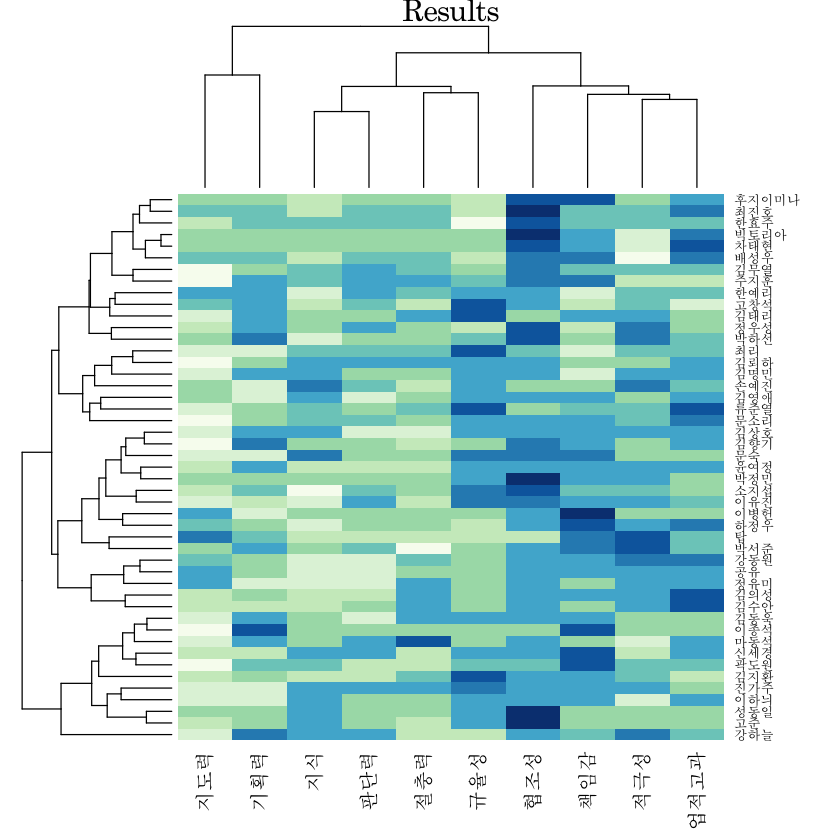

In [48]:
library(extrafont)

par(family="AppleMyungjo")

library(gplots)
library(RColorBrewer)

total.heat <- total[,-c(1:2, 13)]
row.names(total.heat) <- total$id
heatmap(as.matrix(total.heat), col = brewer.pal(9, "GnBu"), 
library(extrafont)

library(extrafont)

par(family="AppleMyungjo")par(family="AppleMyungjo")          trace = "none", key = FALSE, dend = "none", main = "Results")

Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <80>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <83>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot subst

“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <a0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <9d>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in strwidth(newrownames, cex 

“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <80>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <95>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <98>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newcolnames,

“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <9d>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <a2>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <85>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <84>”Warning message in strwidth(newrownames,

“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <83>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <98>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <84>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <80>”Warning message in strwidth(newcolnames,

“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <99>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <9b>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <90>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '공유' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newcolnames, cex

“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <95>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <84>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in strwidth(newrownames,

“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <96>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <a5>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <9d>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '이종석' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in strwidth(newcolnames,

“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <8c>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <83>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in strwidth(newcolnames,

“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <95>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <99>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <9b>”Warning message in strwidth(newrownames,

“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <98>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <88>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '손예진' in 'mbcsToSbcs': dot substituted for <84>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '박서준' in 'mbcsToSbcs': dot substituted for <95>”Warning message in strwidth(newcolnames,

“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <ac>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <80>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <96>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <a5>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in strwidth(newrownames,

“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <91>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <97>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '이병헌' in 'mbcsToSbcs': dot substituted for <8c>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on '차태현' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames,

“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <a0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <95>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <9a>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <95>”Warning message in strwidth(newcolnames,

“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <80>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <96>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <a5>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on '김향기' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“con

“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <9a>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“유니코드 문자 U+d558에 대한 폰트메트릭을 알 수 없습니다”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“유니코드 문자 U+c815에 대한 폰트메트릭을 알 수 없습니다”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“유니코드 문자 U+c6b0에 대한 폰트메트릭을 알 수 없습니다”Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in text.default(pos.xl

“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <80>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <ed>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <83>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <eb>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '김태리' in 'mbcsToSbcs': dot substituted for <a6>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“con

“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <ec>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <9a>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '하정우' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <ea>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“conversion failure on '강동원' in 'mbcsToSbcs': dot substituted for <95>”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“con

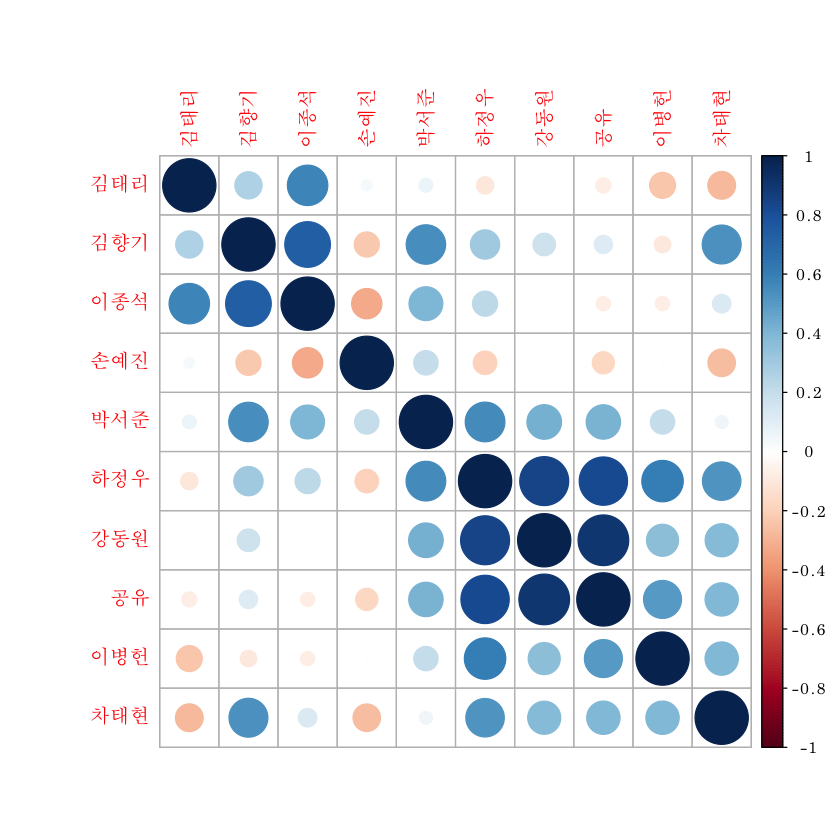

In [52]:
library(extrafont)

par(family="AppleMyungjo")


library(corrplot)

t_leader <- t(agg_leader[,-c(1:2,13)])
colnames(t_leader) <- agg_leader[,1]
corrplot(cor(t_leader), order = "hclust")